<p id="back" style="background-color:powderblue; font-size: 200%; color: red;text-align:center;"> 回到这里</p>

<h1>模块载入</h1>

In [233]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [221]:
path_default = os.getcwd()
path_figure = path_default + '/figure'
path_data = path_default + '/datasets'
path_result = path_default + '/results'

In [222]:
if not os.path.exists(path_result):   
    os.mkdir(path_result)
if not os.path.exists(path_data):   
    os.mkdir(path_data)
if not os.path.exists(path_figure):   
    os.mkdir(path_figure)

In [223]:
df = pd.Series([0.02,0.04,0.07,0.12,0.06,0.05,0.08,0.14,0.1,0.02,0.03,0.02,0.06,0.07,0.09,0.06,0.11])

In [224]:
#Objective function to minimize
def garch_filter(omega, alpha1, beta, rv):
    T = len(rv)
    Sigma_2 = np.zeros(T)

    for i in range(T):
        if i == 0:
            Sigma_2[i] = omega/(1 - alpha1 - beta)
        else:
            Sigma_2[i] = omega + (alpha1 * rv[i - 1]**2) + (beta * Sigma_2[i - 1])

    return Sigma_2

In [225]:
def garch_loglike(vP, r,k):
    T = len(r)
    omega = vP[0]
    alpha1 = vP[1]
    beta = vP[2]

    sigma_2 = garch_filter(omega, alpha1, beta, r)

    LogL = -np.sum(-np.log(sigma_2)-r**2/sigma_2)*k

    return LogL

In [226]:
vp0 = (0.1,0.05,0.92)
bounds = ((0.0001,None),(0.0001,None),(0.0001,None))
res = opt.minimize(fun=garch_loglike,
                   x0=vp0,
                   args=(df,10), ## 注意args需要传入一个
                   method='L-BFGS-B',
                   bounds=bounds,
                   options={'disp':True})

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.47037D+02    |proj g|=  9.19900D-01

At iterate    1    f= -3.52303D+02    |proj g|=  5.21946D-01

At iterate    2    f= -6.96699D+02    |proj g|=  4.67929D-01
  ys=-4.741E+02  -gs= 1.674E+02 BFGS update SKIPPED

At iterate    3    f= -7.07400D+02    |proj g|=  4.64670D-01

At iterate    4    f= -7.07405D+02    |proj g|=  1.89097D+01

At iterate    5    f= -7.07609D+02    |proj g|=  2.87849D+02

At iterate    6    f= -7.07848D+02    |proj g|=  1.85621D+02

At iterate    7    f= -7.07870D+02    |proj g|=  1.12489D+02

At iterate    8    f= -7.07877D+02    |proj g|=  2.82680D+01

At iterate    9    f= -7.07882D+02    |proj g|=  1.65431D+01

At iterate   10    f= -7.07892D+02    |proj g|=  1.68711D+01

At iterate   11    f= -7.07915D+02    |proj g|=  1.72375D+01

At iterate   12    f= -7.07976D+02  

In [231]:
res.x

array([2.76825362e-03, 5.46590248e-01, 1.00000000e-04])

In [232]:
garch_filter(res.x[0],res.x[1],res.x[2],df)

array([0.00610676, 0.0029875 , 0.0036431 , 0.00544691, 0.0106397 ,
       0.00473704, 0.0041352 , 0.00626684, 0.01348205, 0.0082355 ,
       0.00298771, 0.00326048, 0.00298722, 0.00473628, 0.00544702,
       0.00719618, 0.0047367 ])

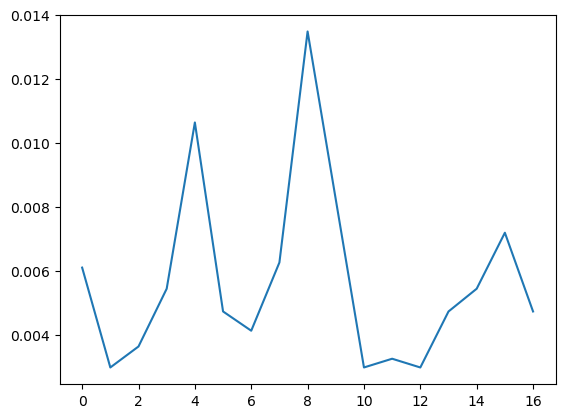

In [234]:
plt.plot(garch_filter(res.x[0],res.x[1],res.x[2],df))

In [236]:
class garch():
    
    '''
    Parameters:
    {
    ME: 均值方程, 输入ARMA(p,q), [p,q]
    VE: 波动率方程 输入 [m,n]
    ERROR: "Normal, Student-t"
    }
    '''
    import matplotlib.pyplot as plt
    import scipy.optimize as opt
    def __init__(self,data,**kwargs):
        self.data = data
        self.nalpha = kwargs['ME']
        self.nbeta = kwargs['VE']
        if 'ERROR' not in kwargs.keys():
            self.error_dis = 'Normal'
        self.data = data
        self.name = "ARMA({},{})".format(kwargs['ME'][0],format(kwargs['ME'][1])) + '+' +\
                    "ARCH({},{})".format(kwargs['VE'][0],format(kwargs['VE'][1])) + '+' + self.error_dis
    def garch_filter(self):
        return 0
    def garch_loglike(self):
        return 0
    def garch_fit(self):
        return 0

In [215]:
par = {'ME':[1,2],"VE":[1,3]}

In [216]:
garch_1_1 = garch(df,**par)

In [217]:
garch_1_1.name

'ARMA(1,2)+ARCH(1,3)+Normal'

In [218]:
?garch